# Storytelling Case Study: Airbnb, NYC


Problem background

Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. - Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.
End Objective

To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York.
Presentation - I

Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.
Presentation - II

Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

In [1]:
# Import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Data conversion and Understanding
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

In [3]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
# Check the rows and columns of the dataset
airbnb.shape

(48895, 16)

The dataset contains 48895 rows and 16 columns
Now we have to check whether there are any missing values in the dataset

In [5]:
# Calculating the missing values in the dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Now we have the missing values, there are certain columns that are not efficient to the dataset
airbnb.drop(['id','name','last_review'], axis = 1, inplace = True)

In [7]:
# View whether the columns are dropped
airbnb.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
airbnb.reviews_per_month.isnull().sum()


10052

In [9]:
# Now reviews per month contains more missing values which should be replaced with 0 respectively
airbnb.fillna({'reviews_per_month':0},inplace=True)

In [10]:
airbnb.reviews_per_month.isnull().sum()

0

In [11]:
# There are no missing values present in reviews_per_month column
# Now to check the unique values of other columns'
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
len(airbnb.room_type.unique())

3

In [13]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
len(airbnb.neighbourhood_group.unique())

5

In [15]:
len(airbnb.neighbourhood.unique())

221

In [ ]:
airbnb.to_csv(r'Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv',index=False, header=True)

In [16]:
airbnb.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [17]:
airbnb2 = airbnb.sort_values(by="calculated_host_listings_count",ascending=False)
airbnb2.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39773,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332
41463,219517861,Sonder (NYC),Manhattan,Financial District,40.70782,-74.01227,Entire home/apt,396,2,8,2.12,327,289
41469,219517861,Sonder (NYC),Manhattan,Financial District,40.70620,-74.01192,Entire home/apt,498,2,8,2.50,327,255
38294,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
41468,219517861,Sonder (NYC),Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,0.77,327,351


In [1]:
pip install python-pptx

Note: you may need to restart the kernel to use updated packages.


# Top 10 Hosts:

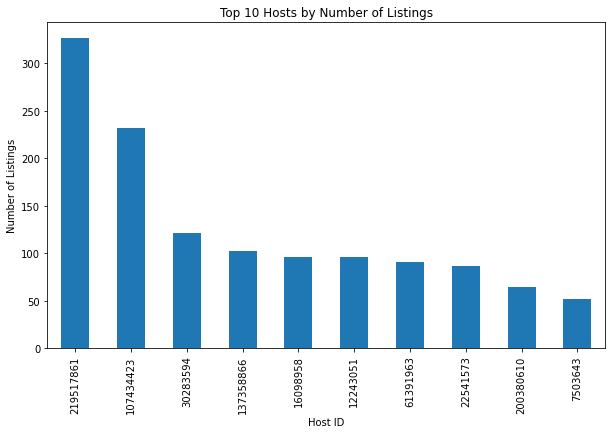

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Airbnb dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Calculate the count of listings for each host
host_counts = airbnb['host_id'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
host_counts.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Top 10 Hosts by Number of Listings')

# Save the chart as an image file
plt.savefig('top_10_hosts.png')

# Display the chart
plt.show()

# Room Type with respect to Neighbourhood Group:

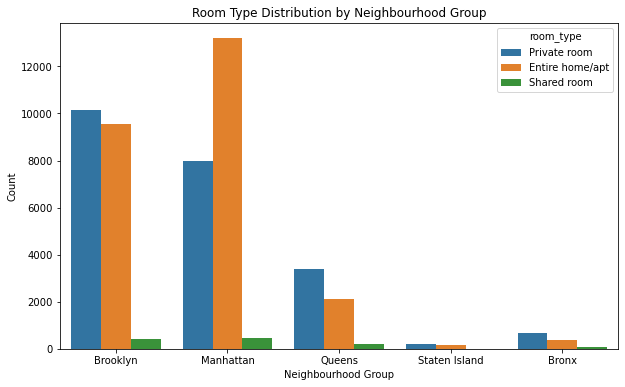

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Airbnb dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=airbnb, x='neighbourhood_group', hue='room_type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Room Type Distribution by Neighbourhood Group')

# Save the chart as an image file
plt.savefig('room_type_neighbourhood_group.png')

# Display the chart
plt.show()

# Price Analysis Neighbourhood-wise:

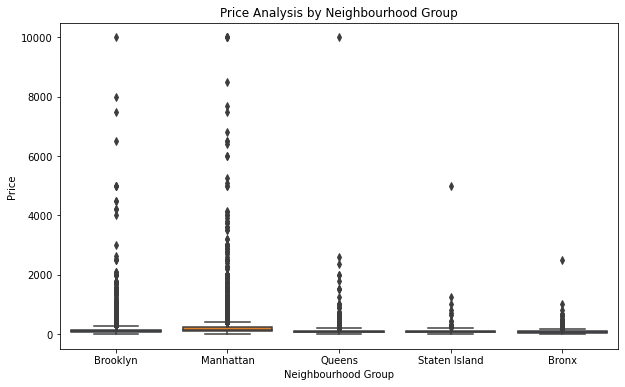

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Airbnb dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price Analysis by Neighbourhood Group')

# Save the chart as an image file
plt.savefig('price_analysis_neighbourhood.png')

# Display the chart
plt.show()

# Average Price of Neighbourhood Groups:

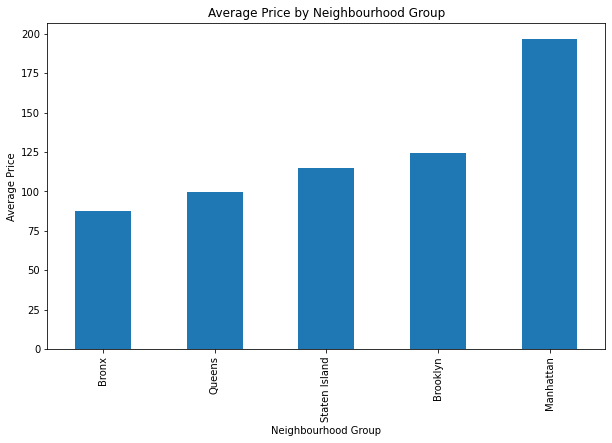

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Airbnb dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Calculate the average price for each neighbourhood group
avg_price_neighbourhood = airbnb.groupby('neighbourhood_group')['price'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_neighbourhood.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')

# Save the chart as an image file
plt.savefig('average_price_neighbourhood.png')

# Display the chart
plt.show()

# Customer Booking with respect to Minimum Nights:

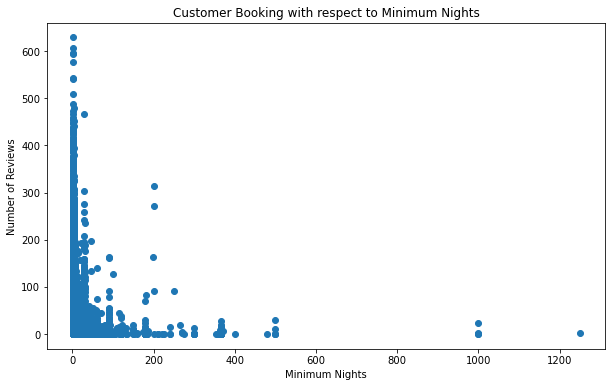

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Airbnb dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(airbnb['minimum_nights'], airbnb['number_of_reviews'])
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.title('Customer Booking with respect to Minimum Nights')

# Save the chart as an image file
plt.savefig('customer_booking_min_nights.png')

# Display the chart
plt.show()

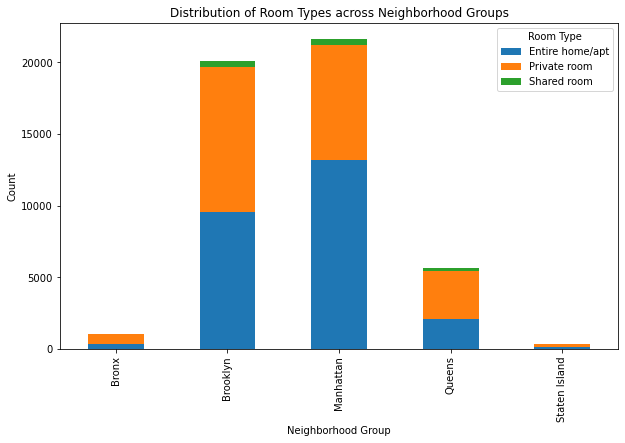

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Airbnb dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Group the data by neighborhood group and room type, and calculate the count
room_type_counts = airbnb.groupby(['neighbourhood_group', 'room_type']).size().unstack()

# Plotting the bar chart
room_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customizing the chart
plt.title('Distribution of Room Types across Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.legend(title='Room Type')

# Display the chart
plt.show()

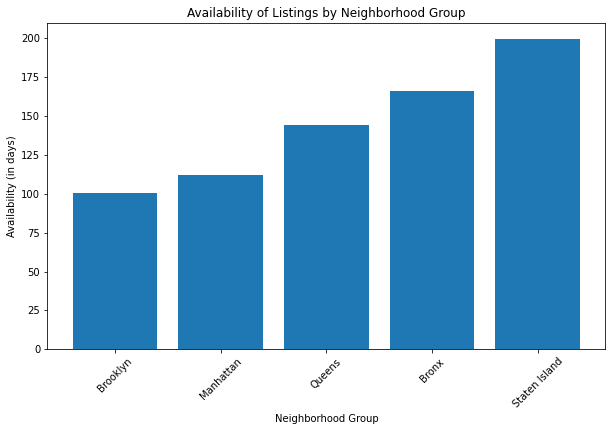

In [12]:
import matplotlib.pyplot as plt

# Calculate the availability by neighborhood
availability = airbnb.groupby('neighbourhood_group')['availability_365'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(availability.index, availability)
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability (in days)')
plt.title('Availability of Listings by Neighborhood Group')
plt.xticks(rotation=45)
plt.show()


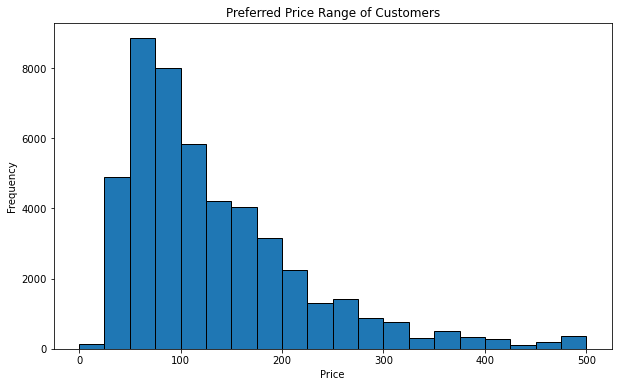

In [13]:
import matplotlib.pyplot as plt

# Filter out listings with price above $500 (outliers)
filtered_data = airbnb[airbnb['price'] <= 500]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Preferred Price Range of Customers')
plt.show()

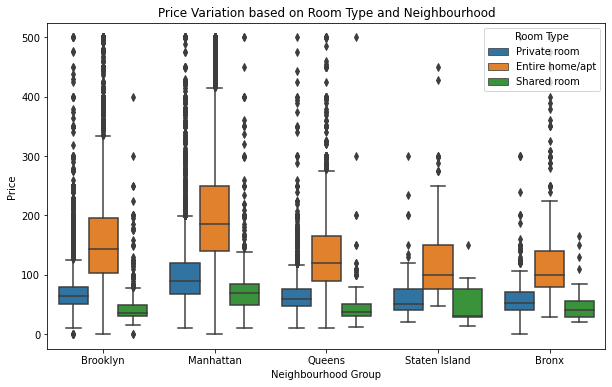

In [14]:
import seaborn as sns

# Filter out listings with price above $500 (outliers)
filtered_data = airbnb[airbnb['price'] <= 500]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=filtered_data)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price Variation based on Room Type and Neighbourhood')
plt.legend(title='Room Type', loc='upper right')
plt.show()


In [15]:
import folium

# Calculate the average price by neighborhood
avg_price_by_neighborhood = airbnb.groupby('neighbourhood')['price'].mean().reset_index()

# Create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data='/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv',
    name='choropleth',
    data=avg_price_by_neighborhood,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price'
).add_to(nyc_map)

# Display the map
nyc_map


ModuleNotFoundError: No module named 'folium'

In [16]:
!pip install folium

     |████████████████████████████████| 102 kB 2.4 MB/s ta 0:00:011


In [1]:
import folium

# Calculate the average price by neighborhood
avg_price_by_neighborhood = airbnb.groupby('neighbourhood')['price'].mean().reset_index()

# Create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data='/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv',
    name='choropleth',
    data=avg_price_by_neighborhood,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price'
).add_to(nyc_map)

# Display the map
nyc_map

NameError: name 'airbnb' is not defined

In [2]:
import pandas as pd
import folium

# Load the Airbnb dataset into a DataFrame
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Calculate the average price by neighborhood
avg_price_by_neighborhood = airbnb.groupby('neighbourhood')['price'].mean().reset_index()

# Create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add markers to the map representing the average price by neighborhood
for index, row in avg_price_by_neighborhood.iterrows():
    neighborhood = row['neighbourhood']
    price = row['price']
    marker = folium.Marker(location=get_coordinates(neighborhood), popup=f"Neighborhood: {neighborhood}<br>Average Price: ${price:.2f}")
    marker.add_to(nyc_map)

# Display the map
nyc_map


NameError: name 'get_coordinates' is not defined

In [4]:
import pandas as pd
import folium

# Load the Airbnb dataset into a DataFrame
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Calculate the average price by neighborhood
avg_price_by_neighborhood = airbnb.groupby('neighbourhood')['price'].mean().reset_index()

# Create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add markers to the map representing the average price by neighborhood
for index, row in avg_price_by_neighborhood.iterrows():
    neighborhood = row['neighbourhood']
    price = row['price']
    # Get the latitude and longitude of the neighborhood
    latitude = airbnb.loc[airbnb['neighbourhood'] == neighborhood, 'latitude'].mean()
    longitude = airbnb.loc[airbnb['neighbourhood'] == neighborhood, 'longitude'].mean()
    marker = folium.Marker(location=[latitude, longitude], popup=f"Neighborhood: {neighborhood}<br>Average Price: ${price:.2f}")
    marker.add_to(nyc_map)

# Display the map
nyc_map


In [1]:
import pandas as pd

# Load the dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Calculate the number of bookings for each neighborhood
bookings_by_neighborhood = airbnb['neighbourhood_group'].value_counts()

# Calculate the number of reviews for each neighborhood
reviews_by_neighborhood = airbnb.groupby('neighbourhood_group')['number_of_reviews'].sum()

# Select the top 5 neighborhoods based on bookings
top_neighborhoods_bookings = bookings_by_neighborhood.head(5)

# Select the top 5 neighborhoods based on reviews
top_neighborhoods_reviews = reviews_by_neighborhood.head(5)


In [2]:
import pandas as pd

# Load the dataset
airbnb = pd.read_csv("/Users/vivekys/Vivek/UpGrad - IIITB/BoomBikes Case Study/AIRBNB Case Study Upgrad/AB_NYC_2019.csv")

# Calculate the number of bookings for each neighborhood
bookings_by_neighborhood = airbnb['neighbourhood'].value_counts()

# Calculate the number of reviews for each neighborhood
reviews_by_neighborhood = airbnb.groupby('neighbourhood')['number_of_reviews'].sum()

# Select the top 5 neighborhoods based on bookings
top_neighborhoods_bookings = bookings_by_neighborhood.head(5)

# Select the top 5 neighborhoods based on reviews
top_neighborhoods_reviews = reviews_by_neighborhood.head(5)

print("Top 5 Neighborhoods based on Bookings:")
print(top_neighborhoods_bookings)

print("\nTop 5 Neighborhoods based on Reviews:")
print(top_neighborhoods_reviews)


Top 5 Neighborhoods based on Bookings:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

Top 5 Neighborhoods based on Reviews:
neighbourhood
Allerton          1803
Arden Heights       31
Arrochar           307
Arverne           2253
Astoria          19310
Name: number_of_reviews, dtype: int64


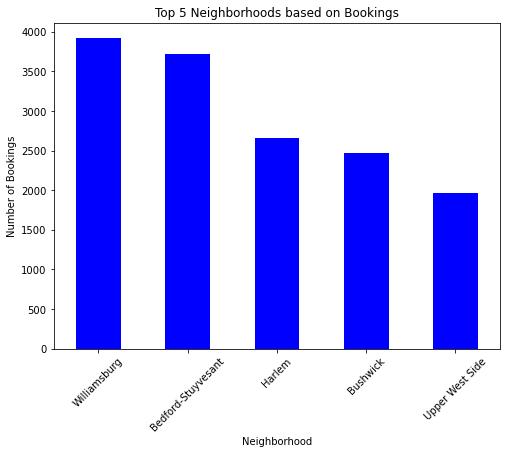

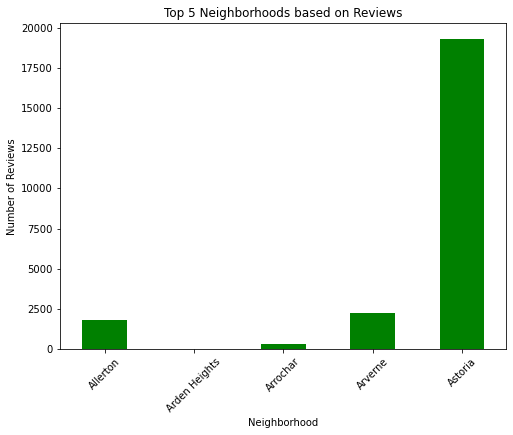

In [3]:
import matplotlib.pyplot as plt

# Plotting the top neighborhoods based on bookings
plt.figure(figsize=(8, 6))
bookings_by_neighborhood.head(5).plot(kind='bar', color='blue')
plt.title('Top 5 Neighborhoods based on Bookings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Plotting the top neighborhoods based on reviews
plt.figure(figsize=(8, 6))
top_neighborhoods_reviews.head(5).plot(kind='bar', color='green')
plt.title('Top 5 Neighborhoods based on Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()
